<a href="https://colab.research.google.com/github/Raniah-ran/machine_learning/blob/main/Penguin_Supervised_Machine_Learning_Raniah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

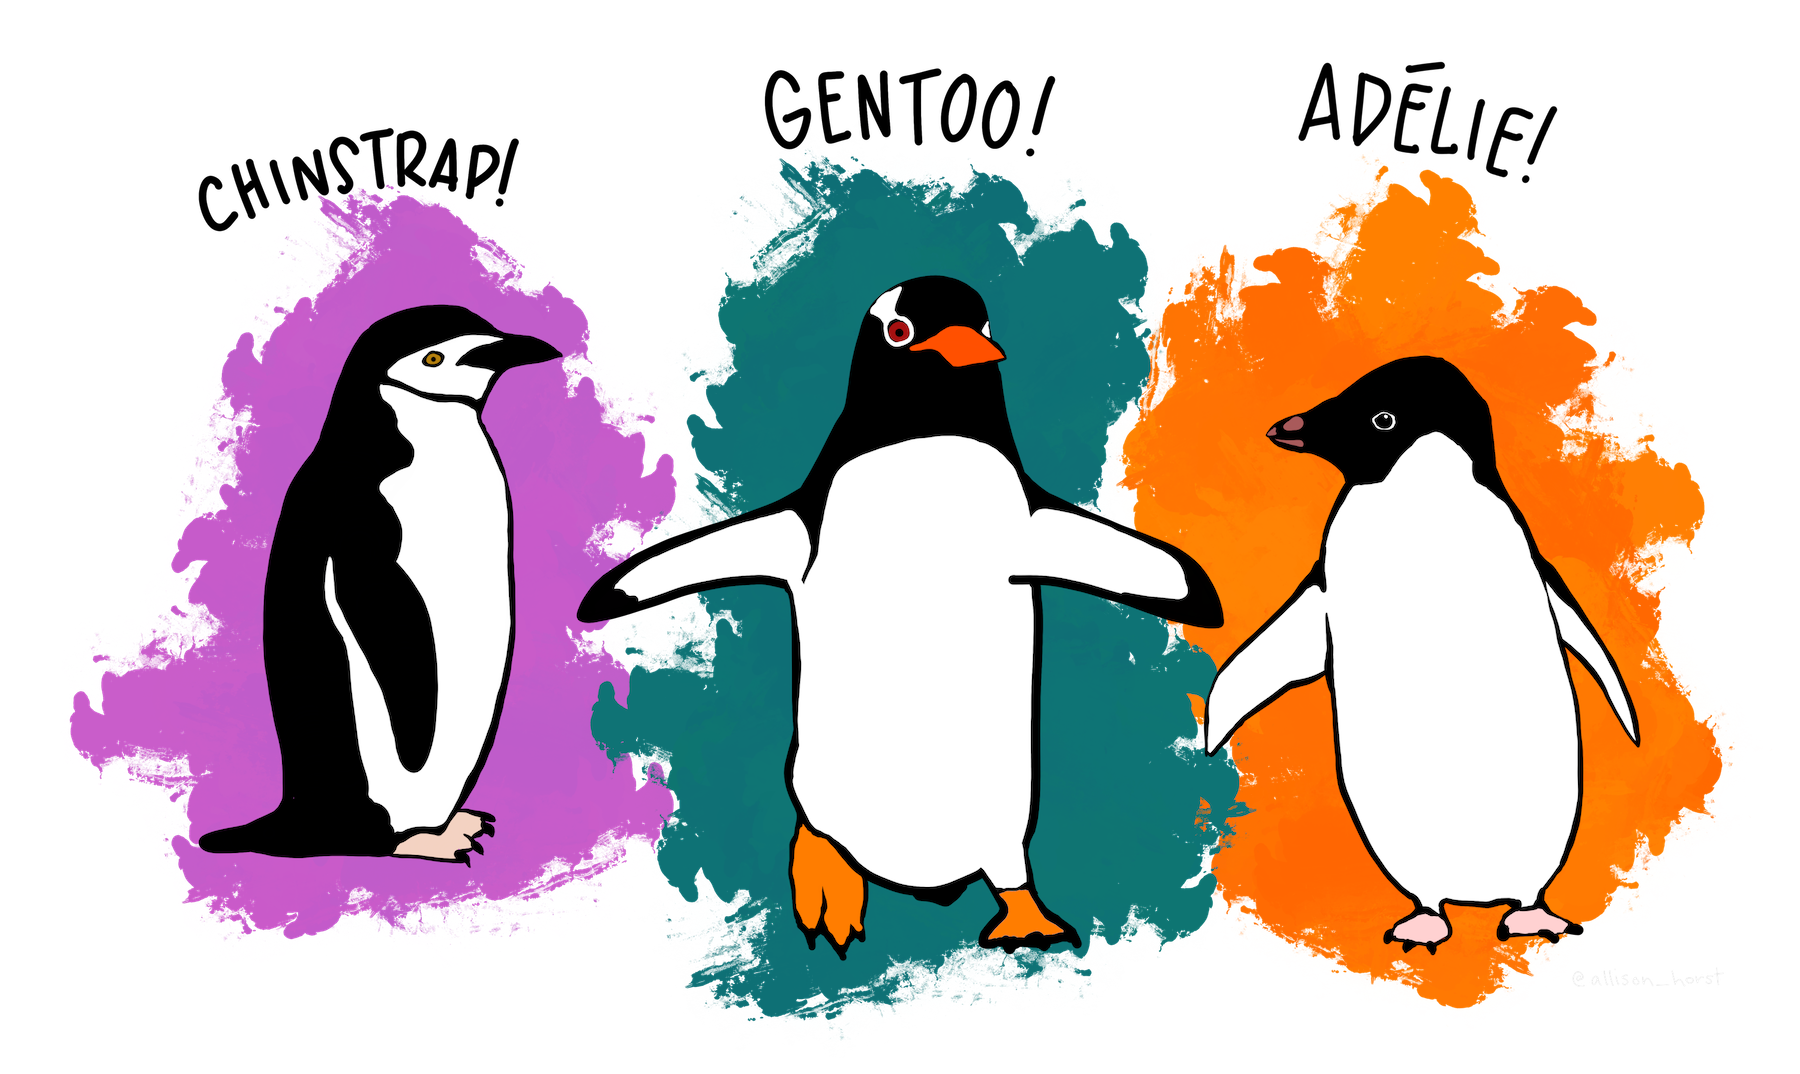

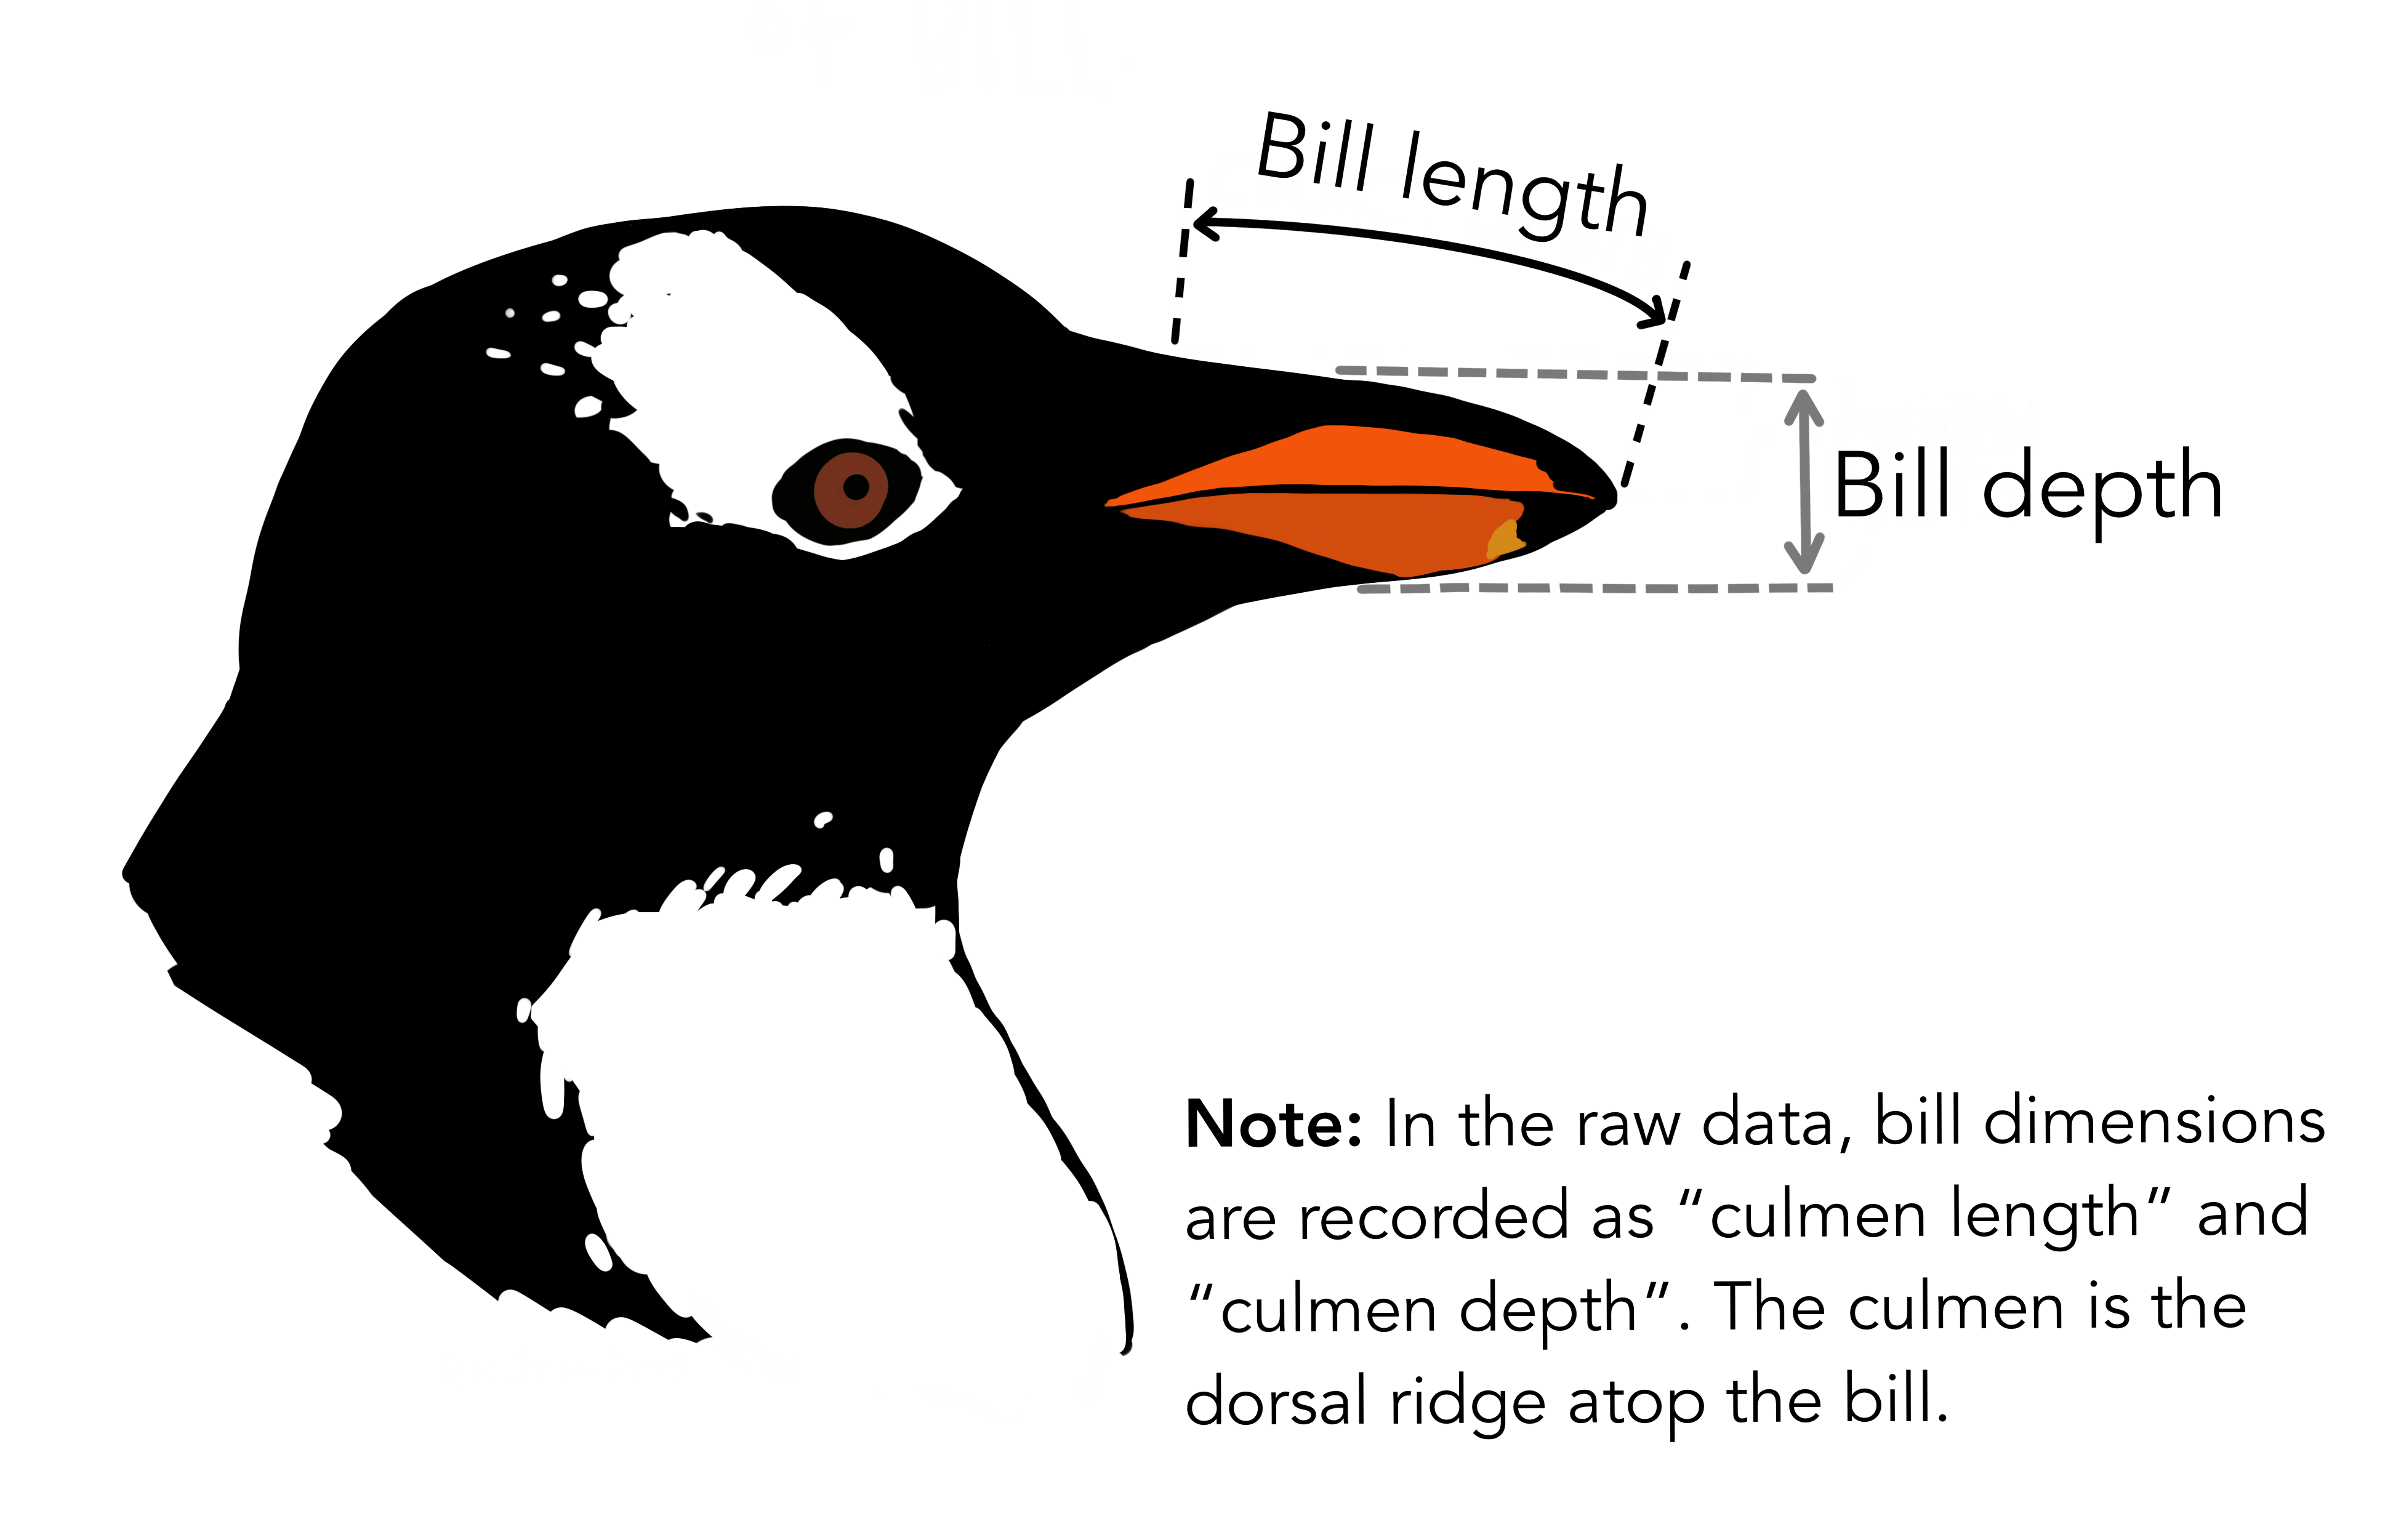

These images are from = https://github.com/allisonhorst/palmerpenguins/blob/main/README.md

Data get from https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data/data

In [ ]:
from google.colab import files
files.upload()

Saving penguins_size.csv to penguins_size.csv


{'penguins_size.csv': b'species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex\nAdelie,Torgersen,39.1,18.7,181,3750,MALE\nAdelie,Torgersen,39.5,17.4,186,3800,FEMALE\nAdelie,Torgersen,40.3,18,195,3250,FEMALE\nAdelie,Torgersen,NA,NA,NA,NA,NA\nAdelie,Torgersen,36.7,19.3,193,3450,FEMALE\nAdelie,Torgersen,39.3,20.6,190,3650,MALE\nAdelie,Torgersen,38.9,17.8,181,3625,FEMALE\nAdelie,Torgersen,39.2,19.6,195,4675,MALE\nAdelie,Torgersen,34.1,18.1,193,3475,NA\nAdelie,Torgersen,42,20.2,190,4250,NA\nAdelie,Torgersen,37.8,17.1,186,3300,NA\nAdelie,Torgersen,37.8,17.3,180,3700,NA\nAdelie,Torgersen,41.1,17.6,182,3200,FEMALE\nAdelie,Torgersen,38.6,21.2,191,3800,MALE\nAdelie,Torgersen,34.6,21.1,198,4400,MALE\nAdelie,Torgersen,36.6,17.8,185,3700,FEMALE\nAdelie,Torgersen,38.7,19,195,3450,FEMALE\nAdelie,Torgersen,42.5,20.7,197,4500,MALE\nAdelie,Torgersen,34.4,18.4,184,3325,FEMALE\nAdelie,Torgersen,46,21.5,194,4200,MALE\nAdelie,Biscoe,37.8,18.3,174,3400,FEMALE\nAdelie,Biscoe,37.7,18

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/penguins_size.csv')

# **EDA & Data Visualization**

In [ ]:
print(df.shape)

(344, 7)


In [ ]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ', '_')

In [ ]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  adelie  torgersen              39.1             18.7              181.0   
1  adelie  torgersen              39.5             17.4              186.0   
2  adelie  torgersen              40.3             18.0              195.0   
3  adelie  torgersen               NaN              NaN                NaN   
4  adelie  torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female

In [ ]:
df.describe(include='all')

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
count      344     344        342.000000       342.000000         342.000000   
unique       3       3               NaN              NaN                NaN   
top     adelie  biscoe               NaN              NaN                NaN   
freq       152     168               NaN              NaN                NaN   
mean       NaN     NaN         43.921930        17.151170         200.915205   
std        NaN     NaN          5.459584         1.974793          14.061714   
min        NaN     NaN         32.100000        13.100000         172.000000   
25%        NaN     NaN         39.225000        15.600000         190.000000   
50%        NaN     NaN         44.450000        17.300000         197.000000   
75%        NaN     NaN         48.500000        18.700000         213.000000   
max        NaN     NaN         59.600000        21.500000         231.000000   

        body_mass_g   sex  
count    342.000000   334  
unique          NaN     3  
top             NaN  male  
freq            NaN   168  
mean    4201.754386   NaN  
std      801.954536   NaN  
min     2700.000000   NaN  
25%     3550.000000   NaN  
50%     4050.000000   NaN  
75%     4750.000000   NaN  
max     6300.000000   NaN

In [ ]:
df.nunique()

species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
sex                    3
dtype: int64

In [ ]:
for col in categorical_columns:
  print(f'Column: {col}')
  print(df[col].unique())
  print()

Column: species
['adelie' 'chinstrap' 'gentoo']

Column: island
['torgersen' 'biscoe' 'dream']

Column: sex
['male' 'female' nan '.']



### Handling Missing value

In [ ]:
missing_count = df.isnull().sum()
missing_percentage = 100 * df.isnull().sum() / len(df)

missing_df = pd.DataFrame({
    'Missing Values': missing_count,
    '% of Total Values': missing_percentage
}).round(2)

print(missing_df)

                   Missing Values  % of Total Values
species                         0               0.00
island                          0               0.00
culmen_length_mm                2               0.58
culmen_depth_mm                 2               0.58
flipper_length_mm               2               0.58
body_mass_g                     2               0.58
sex                            10               2.91


In [ ]:
#Handling missing values
from sklearn.impute import SimpleImputer

#replace the value '.' in the column 'sex' to nan
df['sex'] = df['sex'].replace('.', np.nan)

#setting strategy to 'most frequent'
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Numerical Features

In [ ]:
print("\nColumns:", df.columns)


Columns: Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


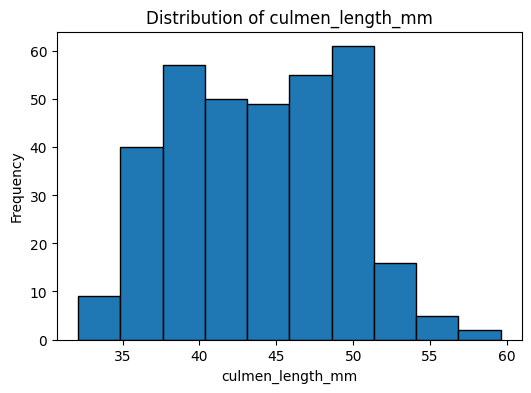

count    344.000000
mean      43.905523
std        5.447882
min       32.100000
25%       39.275000
50%       44.250000
75%       48.500000
max       59.600000
Name: culmen_length_mm, dtype: float64


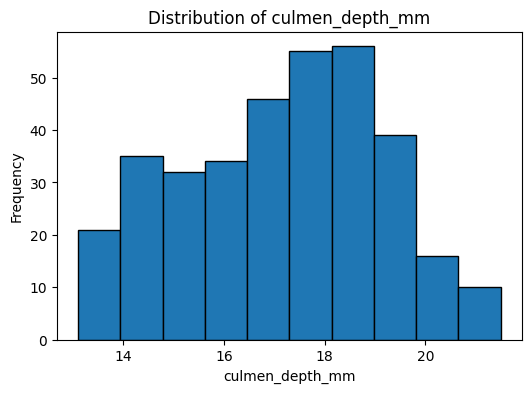

count    344.000000
mean      17.150291
std        1.969061
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: culmen_depth_mm, dtype: float64


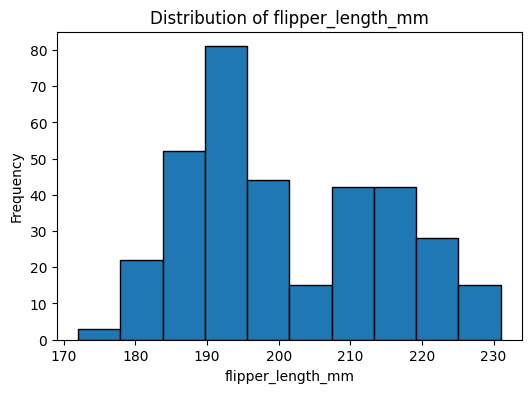

count    344.000000
mean     200.851744
std       14.045266
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64


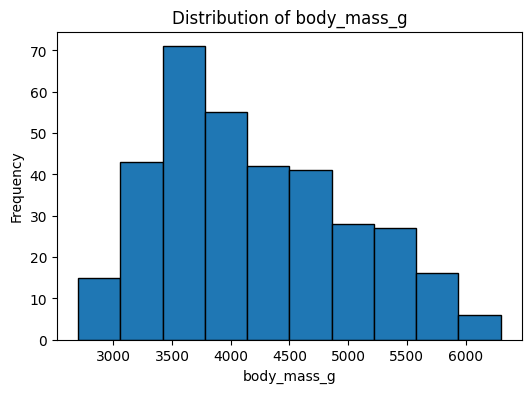

count     344.000000
mean     4199.418605
std       800.197923
min      2700.000000
25%      3550.000000
50%      4025.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64


In [ ]:
numerical_columns = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']]

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    counts, bins, patches = plt.hist(df[col].dropna(), bins=10, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    print(df[col].describe())

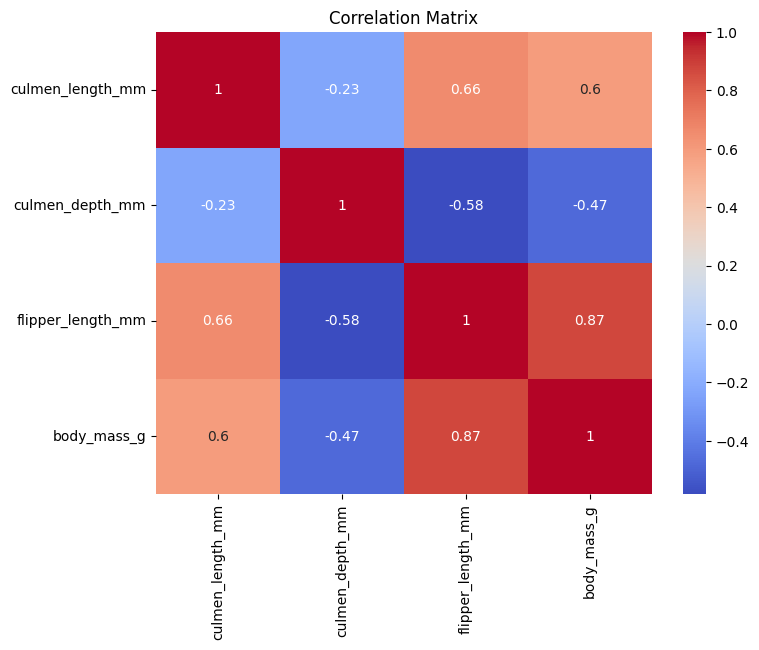

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


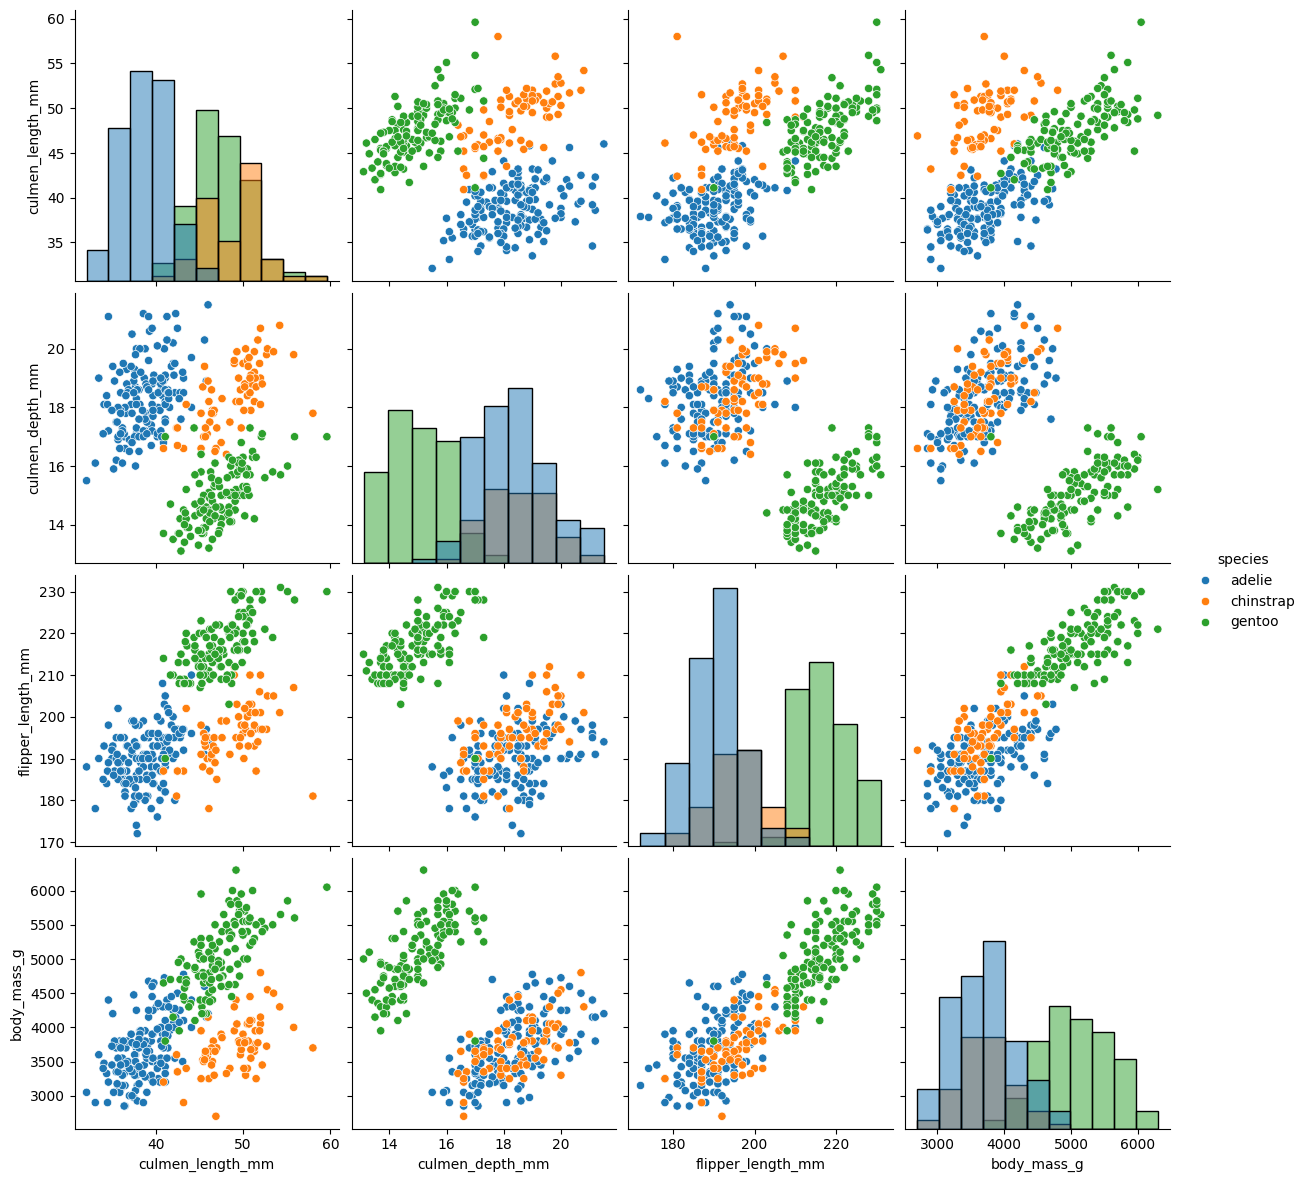

In [ ]:
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

## **Categorical Features**

In [ ]:
for col in categorical_columns:
  print(f'Column: {col}')
  print(df[col].unique())
  print()

Column: species
['adelie' 'chinstrap' 'gentoo']

Column: island
['torgersen' 'biscoe' 'dream']

Column: sex
['male' 'female']



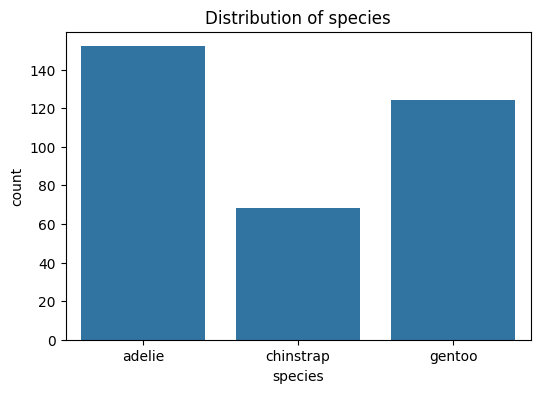

species
adelie       152
gentoo       124
chinstrap     68
Name: count, dtype: int64


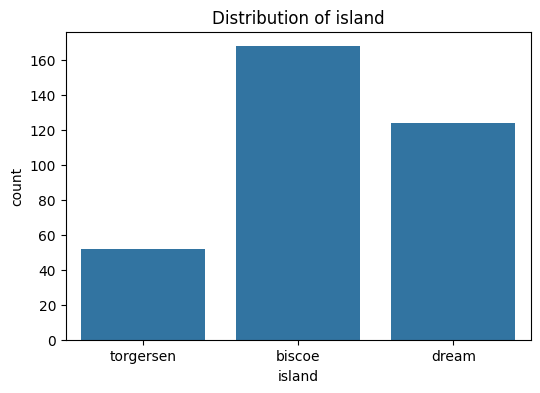

island
biscoe       168
dream        124
torgersen     52
Name: count, dtype: int64


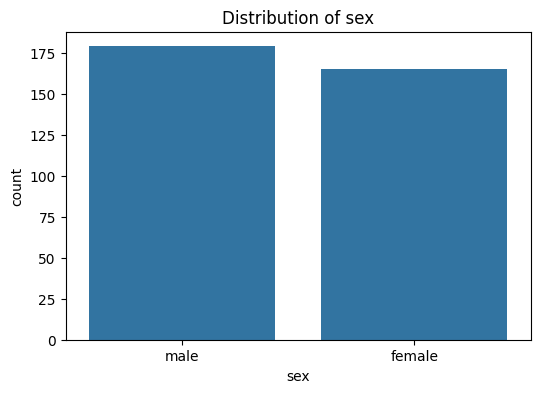

sex
male      179
female    165
Name: count, dtype: int64


In [ ]:
for col in categorical_columns:
  plt.figure(figsize=(6, 4))
  ax = sns.countplot(data=df, x=col)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()
  # Print the exact counts
  print(df[col].value_counts())

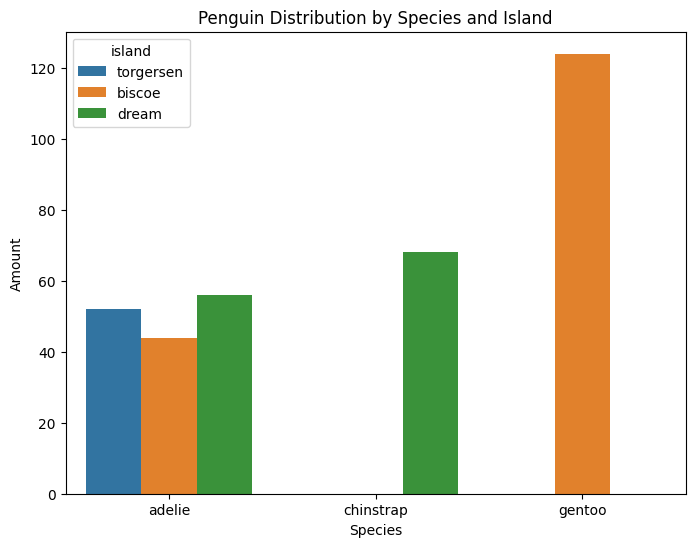

species    island   
gentoo     biscoe       124
chinstrap  dream         68
adelie     dream         56
           torgersen     52
           biscoe        44
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='species', hue='island')
plt.title('Penguin Distribution by Species and Island')
plt.xlabel('Species')
plt.ylabel('Amount')
plt.show()
print(df[['species', 'island']].value_counts())

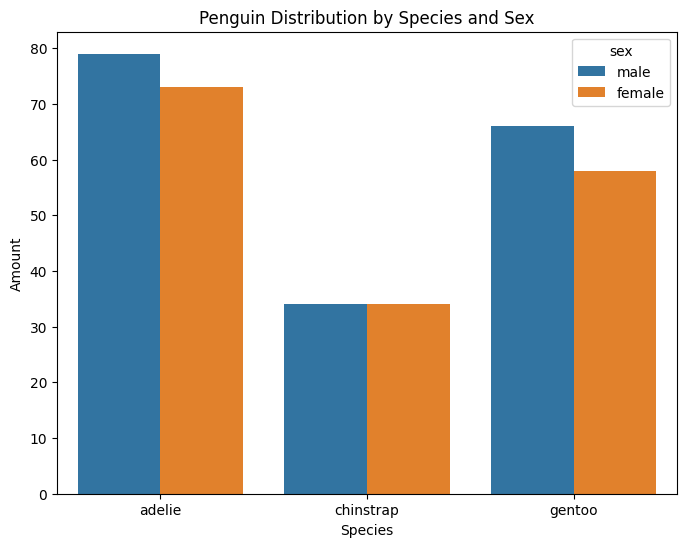

species    sex   
adelie     male      79
           female    73
gentoo     male      66
           female    58
chinstrap  female    34
           male      34
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='species', hue='sex')
plt.title('Penguin Distribution by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Amount')
plt.show()
print(df[['species', 'sex']].value_counts())

## Numerical & Categorical Features

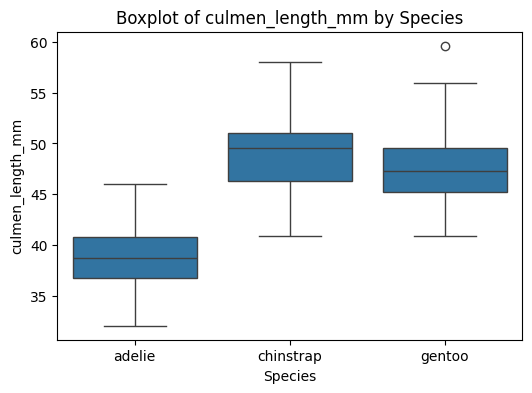


Descriptive Statistics for culmen_length_mm by Species:
           count       mean       std   min     25%    50%     75%   max
species                                                                 
adelie     152.0  38.806579  2.661167  32.1  36.775  38.80  40.800  46.0
chinstrap   68.0  48.833824  3.339256  40.9  46.350  49.55  51.075  58.0
gentoo     124.0  47.453226  3.122732  40.9  45.275  47.25  49.525  59.6


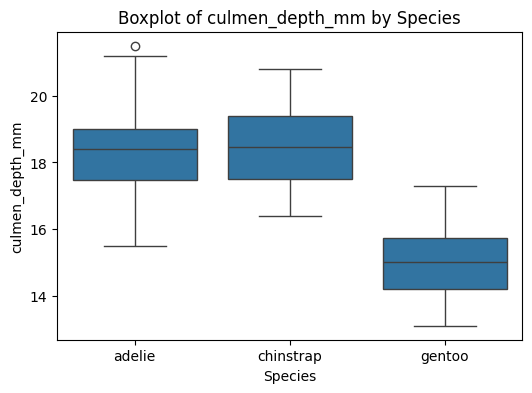


Descriptive Statistics for culmen_depth_mm by Species:
           count       mean       std   min     25%    50%     75%   max
species                                                                 
adelie     152.0  18.337500  1.217522  15.5  17.475  18.40  19.000  21.5
chinstrap   68.0  18.420588  1.135395  16.4  17.500  18.45  19.400  20.8
gentoo     124.0  14.998387  0.993882  13.1  14.200  15.00  15.725  17.3


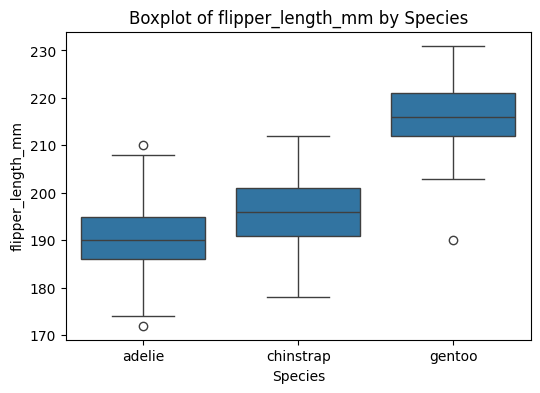


Descriptive Statistics for flipper_length_mm by Species:
           count        mean       std    min    25%    50%    75%    max
species                                                                  
adelie     152.0  189.953947  6.517769  172.0  186.0  190.0  195.0  210.0
chinstrap   68.0  195.823529  7.131894  178.0  191.0  196.0  201.0  212.0
gentoo     124.0  216.967742  6.904618  190.0  212.0  216.0  221.0  231.0


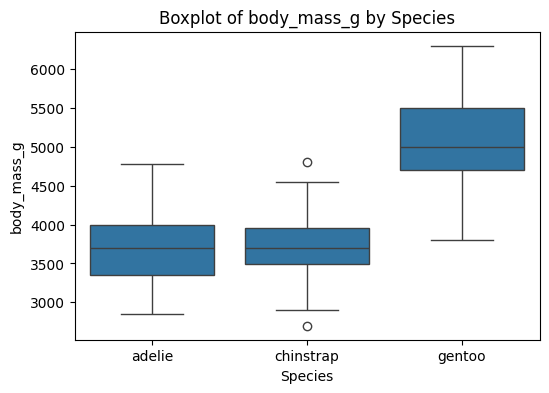


Descriptive Statistics for body_mass_g by Species:
           count         mean         std     min     25%     50%     75%  \
species                                                                     
adelie     152.0  3701.315789  457.116190  2850.0  3350.0  3700.0  4000.0   
chinstrap   68.0  3733.088235  384.335081  2700.0  3487.5  3700.0  3950.0   
gentoo     124.0  5065.725806  514.973633  3800.0  4700.0  5000.0  5500.0   

              max  
species            
adelie     4775.0  
chinstrap  4800.0  
gentoo     6300.0  


In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f'Boxplot of {col} by Species')
    plt.xlabel('Species')
    plt.ylabel(col)
    plt.show()

    print(f'\nDescriptive Statistics for {col} by Species:')
    print(df.groupby('species')[col].describe())

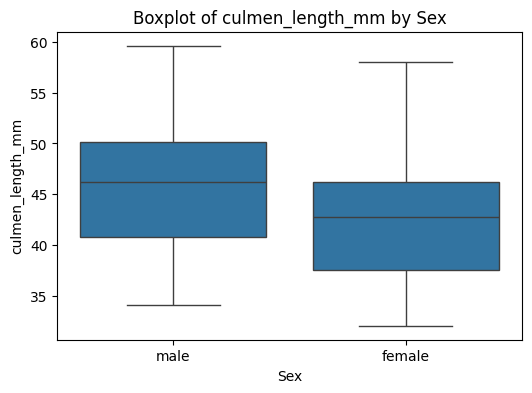


Descriptive Statistics for culmen_length_mm by Sex:
        count       mean       std   min    25%   50%    75%   max
sex                                                               
female  165.0  42.096970  4.903476  32.1  37.60  42.8  46.20  58.0
male    179.0  45.572626  5.404761  34.1  40.85  46.2  50.15  59.6


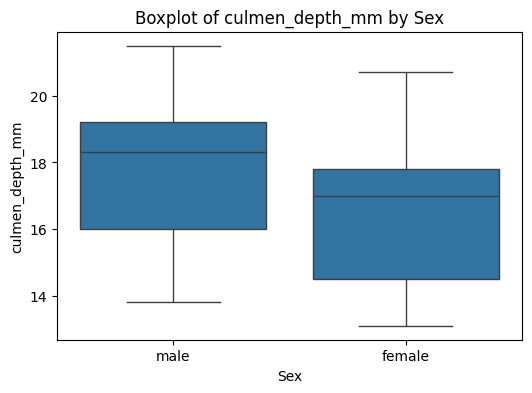


Descriptive Statistics for culmen_depth_mm by Sex:
        count       mean       std   min   25%   50%   75%   max
sex                                                             
female  165.0  16.425455  1.795681  13.1  14.5  17.0  17.8  20.7
male    179.0  17.818436  1.887971  13.8  16.0  18.3  19.2  21.5


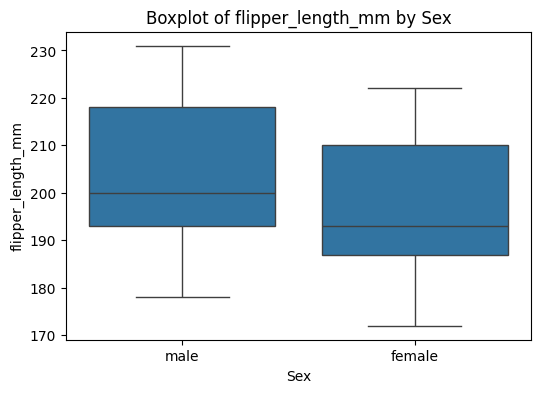


Descriptive Statistics for flipper_length_mm by Sex:
        count        mean        std    min    25%    50%    75%    max
sex                                                                    
female  165.0  197.363636  12.500776  172.0  187.0  193.0  210.0  222.0
male    179.0  204.067039  14.645089  178.0  193.0  200.0  218.0  231.0


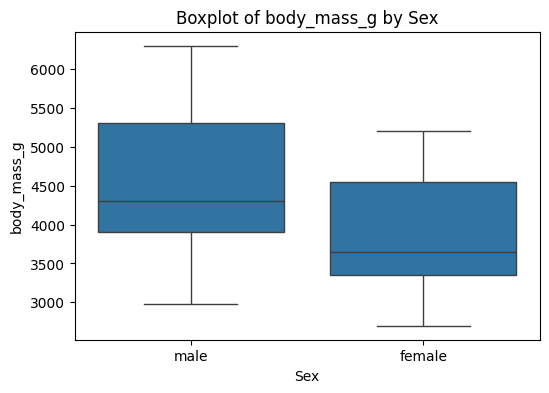


Descriptive Statistics for body_mass_g by Sex:
        count         mean         std     min     25%     50%     75%     max
sex                                                                           
female  165.0  3862.272727  666.172050  2700.0  3350.0  3650.0  4550.0  5200.0
male    179.0  4510.195531  788.984976  2975.0  3900.0  4300.0  5300.0  6300.0


In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='sex', y=col, data=df)
    plt.title(f'Boxplot of {col} by Sex')
    plt.xlabel('Sex')
    plt.ylabel(col)
    plt.show()

    print(f'\nDescriptive Statistics for {col} by Sex:')
    print(df.groupby('sex')[col].describe())

## Convert the categorical columns into numerical value

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)
df_encoded = df_encoded.replace({True: 1, False: 0})
print(df_encoded.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
3              41.1             17.0              190.0       3800.0   
4              36.7             19.3              193.0       3450.0   

   species_adelie  species_chinstrap  species_gentoo  island_biscoe  \
0               1                  0               0              0   
1               1                  0               0              0   
2               1                  0               0              0   
3               1                  0               0              0   
4               1                  0               0              0   

   island_dream  island_torgersen  sex_female  sex_male  
0             0                 1           0         1  
1             0         

<ipython-input-24-169ebe8438ae>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({True: 1, False: 0})


# **Preparation of Train Data and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Split the data into train & test data

In [ ]:
X = df_encoded.drop(columns=['species_adelie', 'species_chinstrap', 'species_gentoo'])
y = df['species']

In [ ]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
print(len(X_train))
print(len(X_test))

275
69


## Standardization for Numerical Features

In [ ]:
X_train.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
150              36.0             17.1              187.0       3700.0   
105              39.7             18.9              184.0       3550.0   
112              39.7             17.7              193.0       3200.0   
162              46.6             17.8              193.0       3800.0   
328              43.3             14.0              208.0       4575.0   

     island_biscoe  island_dream  island_torgersen  sex_female  sex_male  
150              0             1                 0           1         0  
105              1             0                 0           0         1  
112              1             0                 0           1         0  
162              0             1                 0           1         0  
328              1             0                 0           1         0

In [ ]:
numerical_columns_X_train = X_train[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [ ]:
numerical_columns_X_train

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
150              36.0             17.1              187.0       3700.0
105              39.7             18.9              184.0       3550.0
112              39.7             17.7              193.0       3200.0
162              46.6             17.8              193.0       3800.0
328              43.3             14.0              208.0       4575.0
..                ...              ...                ...          ...
203              51.4             19.0              201.0       3950.0
255              48.4             16.3              220.0       5400.0
72               39.6             17.2              196.0       3550.0
235              49.3             15.7              217.0       5850.0
37               42.2             18.5              180.0       3550.0

[275 rows x 4 columns]

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_numerical = scaler.fit_transform(numerical_columns_X_train) # Fit and transform training data

In [ ]:
X_train[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaled_numerical

In [ ]:
X_train.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
150         -1.467375        -0.014523          -0.996580    -0.619472   
105         -0.779205         0.884078          -1.214491    -0.808301   
112         -0.779205         0.285011          -0.560758    -1.248900   
162          0.504140         0.334933          -0.560758    -0.493586   
328         -0.109634        -1.562114           0.528798     0.482028   

     island_biscoe  island_dream  island_torgersen  sex_female  sex_male  
150              0             1                 0           1         0  
105              1             0                 0           0         1  
112              1             0                 0           1         0  
162              0             1                 0           1         0  
328              1             0                 0           1         0

After scaler.fit_transform X_train, lets scaler.transform the X_test

In [ ]:
numerical_columns_X_test = X_test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [ ]:
scaled_numerical_test = scaler.transform(numerical_columns_X_test) # Only transform test data

In [ ]:
X_test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaled_numerical_test

In [ ]:
X_test.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
306         -0.091035        -1.362425           1.255168     0.513499   
341          1.210909        -0.713435           1.545716     1.961185   
291          0.466941        -0.763357           1.473079     1.017042   
102         -1.151189        -0.563668          -1.287128    -1.406258   
289          1.266707        -1.062891           1.618353     1.709413   

     island_biscoe  island_dream  island_torgersen  sex_female  sex_male  
306              1             0                 0           1         0  
341              1             0                 0           0         1  
291              1             0                 0           0         1  
102              1             0                 0           1         0  
289              1             0                 0           0         1

In [ ]:
print("\nColumns:", X_train.columns)


Columns: Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_biscoe', 'island_dream', 'island_torgersen',
       'sex_female', 'sex_male'],
      dtype='object')


# **Logistic Regression → 100%**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Creating and training a Logistic Regression model
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X_train, y_train)

# Predict
y_pred = model_logistic_regression.predict(X_test)

# Calculate the accuracy
accuracy_logistic_regression = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression Model: {accuracy_logistic_regression * 100:.2f}%\n')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression Model: 100.00%

Classification Report:
              precision    recall  f1-score   support

      adelie       1.00      1.00      1.00        34
   chinstrap       1.00      1.00      1.00        11
      gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



# **K-NN → 100%**

K = 1: Mean Accuracy = 98.55%
K = 2: Mean Accuracy = 98.55%
K = 3: Mean Accuracy = 98.55%
K = 4: Mean Accuracy = 98.55%
K = 5: Mean Accuracy = 98.55%
K = 6: Mean Accuracy = 99.27%
K = 7: Mean Accuracy = 98.91%
K = 8: Mean Accuracy = 98.91%
K = 9: Mean Accuracy = 98.91%
K = 10: Mean Accuracy = 98.91%
K = 11: Mean Accuracy = 98.91%
K = 12: Mean Accuracy = 98.91%
K = 13: Mean Accuracy = 98.91%
K = 14: Mean Accuracy = 98.91%
K = 15: Mean Accuracy = 98.91%
K = 16: Mean Accuracy = 98.91%
K = 17: Mean Accuracy = 98.91%
K = 18: Mean Accuracy = 98.91%
K = 19: Mean Accuracy = 98.91%
K = 20: Mean Accuracy = 98.91%
K = 21: Mean Accuracy = 98.91%
K = 22: Mean Accuracy = 98.91%
K = 23: Mean Accuracy = 98.91%
K = 24: Mean Accuracy = 99.27%
K = 25: Mean Accuracy = 98.91%


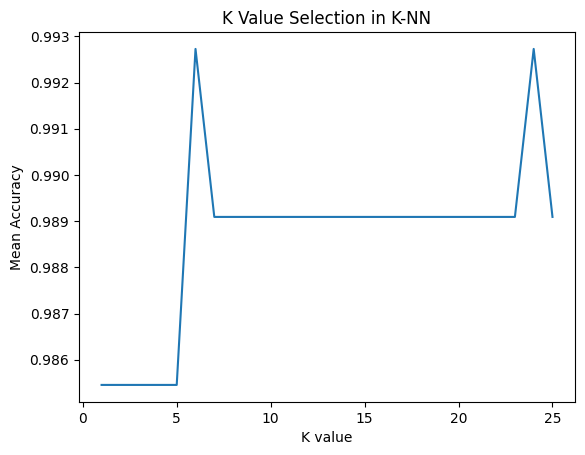

Optimal K: 6, with the mean accuracy of 99.27%


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Search the optimal k value
k_range = range(1, 26)
scores = []

for k in k_range:
    model_search_k = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model_search_k, X_train, y_train, cv=5)
    mean_score = cv_scores.mean()
    scores.append(mean_score)

    print(f'K = {k}: Mean Accuracy = {mean_score * 100:.2f}%')

plt.plot(k_range, scores)
plt.xlabel('K value')
plt.ylabel('Mean Accuracy')
plt.title('K Value Selection in K-NN')
plt.show()

best_k = k_range[scores.index(max(scores))]
best_mean_accuracy = max(scores)

print(f'Optimal K: {best_k}, with the mean accuracy of {best_mean_accuracy * 100:.2f}%')

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=6)
model_KNN.fit(X_train, y_train)

# Predict
y_pred = model_KNN.predict(X_test)

# Calculate the accuracy
accuracy_KNN = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN model = {accuracy_KNN * 100:.2f}%\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy of KNN model = 100.00%

Classification Report:
              precision    recall  f1-score   support

      adelie       1.00      1.00      1.00        34
   chinstrap       1.00      1.00      1.00        11
      gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



# **Decision Tree → 94.2%; 100%**

depth = 1: Mean Accuracy = 78.18%
depth = 2: Mean Accuracy = 96.73%
depth = 3: Mean Accuracy = 96.36%
depth = 4: Mean Accuracy = 96.00%
depth = 5: Mean Accuracy = 95.27%
depth = 6: Mean Accuracy = 94.55%
depth = 7: Mean Accuracy = 95.27%
depth = 8: Mean Accuracy = 95.27%
depth = 9: Mean Accuracy = 95.27%
depth = 10: Mean Accuracy = 95.27%


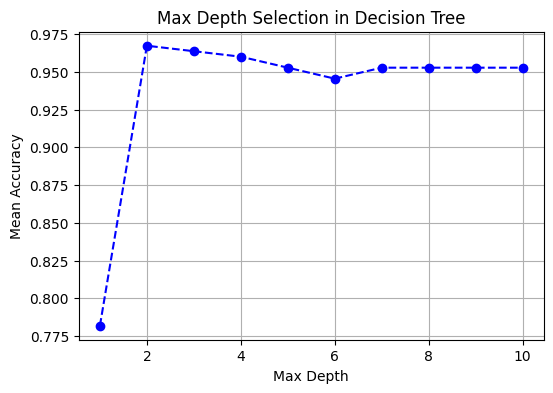

Optimal Max Depth: 2, with the mean accuracy of 96.73%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Search the optimal max_depth
max_depth_range = range(1, 11)
scores = []

for depth in max_depth_range:
    model_tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    cv_score = cross_val_score(model_tree, X_train, y_train, cv=5)
    mean_score = cv_score.mean()
    scores.append(mean_score)

    print(f'depth = {depth}: Mean Accuracy = {mean_score * 100:.2f}%')

plt.figure(figsize=(6, 4))
plt.plot(max_depth_range, scores, marker='o', linestyle='--', color='b')
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.title('Max Depth Selection in Decision Tree')
plt.grid()
plt.show()

best_depth = max_depth_range[scores.index(max(scores))]
best_mean_accuracy = max(scores)
print(f'Optimal Max Depth: {best_depth}, with the mean accuracy of {best_mean_accuracy * 100:.2f}%')

In [ ]:
# Create and train a Decision Tree model
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
model_tree.fit(X_train, y_train)

# Predict
y_pred = model_tree.predict(X_test)

# Calculate the accuracy
accuracy_tree = accuracy_score(y_test, y_pred)
print(f'When Max Depth = 2, The Accuracy of Decision Tree Model: {accuracy_tree * 100:.2f}%\n')

print("Classification Report:")
print(classification_report(y_test, y_pred))

When Max Depth = 2, The Accuracy of Decision Tree Model: 94.20%

Classification Report:
              precision    recall  f1-score   support

      adelie       0.97      0.91      0.94        34
   chinstrap       0.77      0.91      0.83        11
      gentoo       1.00      1.00      1.00        24

    accuracy                           0.94        69
   macro avg       0.91      0.94      0.92        69
weighted avg       0.95      0.94      0.94        69



lets try higher max depth, such as 4

In [ ]:
# Create and train a Decision Tree model
model_tree_4 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
model_tree_4.fit(X_train, y_train)

# Predict
y_pred = model_tree_4.predict(X_test)

# Calculate the accuracy
accuracy_tree = accuracy_score(y_test, y_pred)
print(f'When Max Depth = 4, The Accuracy of Decision Tree Model: {accuracy_tree * 100:.2f}%\n')

print("Classification Report:")
print(classification_report(y_test, y_pred))

When Max Depth = 4, The Accuracy of Decision Tree Model: 100.00%

Classification Report:
              precision    recall  f1-score   support

      adelie       1.00      1.00      1.00        34
   chinstrap       1.00      1.00      1.00        11
      gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69




*  Max Depth = 2 (94.20% accuracy): The model is too simple (underfitting) and doesn’t capture enough details, leading to a lower test accuracy, even though it had the best mean accuracy during training.
*  Max Depth = 4 (100% accuracy): The model learns more details, improving its ability to generalize to the test set.

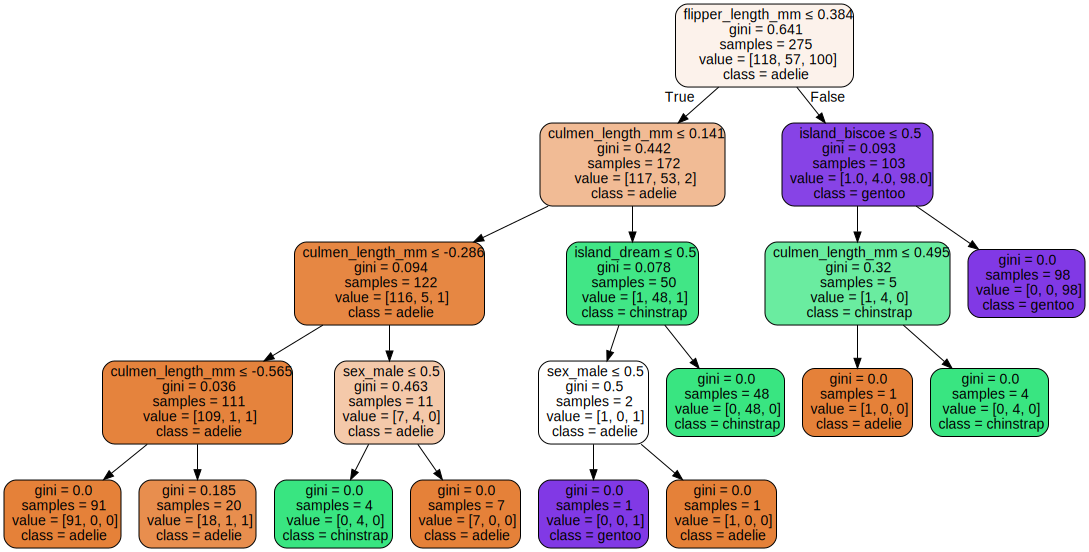

In [ ]:
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

# Export decision tree to dot format
dot_data = export_graphviz(model_tree_4, out_file=None,
                         feature_names=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g','island_biscoe', 'island_dream', 'island_torgersen', 'sex_female',
       'sex_male'],
                         class_names=model_tree_4.classes_,
                         filled=True, rounded=True,
                         special_characters=True)

# Visualize with Graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True) # Save image as PNG
graph

# **Random Forest → 98.55%, 100%**

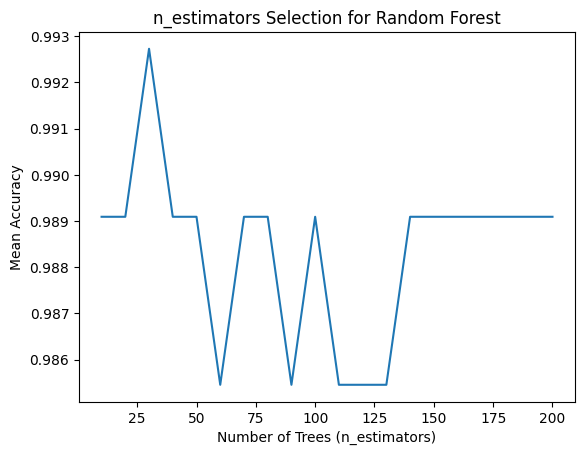

n_estimators Optimal: 30, with the mean accuracy of 99.27%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Search the optimal n_estimators_range
n_estimators_range = range(10, 201, 10)  # Test from 10 to 200 trees, with a range of 10 from one value to another
scores = []

for n in n_estimators_range:
    model_rf = RandomForestClassifier(n_estimators=n, random_state=1)
    cv_score = cross_val_score(model_rf, X_train, y_train, cv=5).mean()
    scores.append(cv_score)

plt.plot(n_estimators_range, scores)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Accuracy')
plt.title('n_estimators Selection for Random Forest')
plt.show()

best_n_estimators = n_estimators_range[scores.index(max(scores))]
best_mean_accuracy = max(scores)
print(f'n_estimators Optimal: {best_n_estimators}, with the mean accuracy of {best_mean_accuracy * 100:.2f}%')

In [ ]:
mean_accuracy_50 = cross_val_score(model_rf, X_train, y_train, cv=5).mean()
print(f'Mean Accuracy for n_estimators = 50: {mean_accuracy_50 * 100:.2f}%')

Mean Accuracy for n_estimators = 50: 98.91%


In [ ]:
# Create and train a Random Forest model
model_rf = RandomForestClassifier(n_estimators=30, random_state=1)
model_rf.fit(X_train, y_train)

# Predict
y_pred = model_rf.predict(X_test)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Model: {accuracy_rf * 100:.2f}%\n')

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy of Random Forest Model: 98.55%

Classification Report:
              precision    recall  f1-score   support

      adelie       1.00      0.97      0.99        34
   chinstrap       0.92      1.00      0.96        11
      gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



lets try higher n_estimators, such as 50

In [ ]:
# Create and train a Random Forest model
model_rf = RandomForestClassifier(n_estimators=50, random_state=1)
model_rf.fit(X_train, y_train)

# Predict
y_pred = model_rf.predict(X_test)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Model: {accuracy_rf * 100:.2f}%\n')

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy of Random Forest Model: 100.00%

Classification Report:
              precision    recall  f1-score   support

      adelie       1.00      1.00      1.00        34
   chinstrap       1.00      1.00      1.00        11
      gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69





*   n_estimators = 30 (98.55% accuracy): The model performed well during training but slightly worse on X_test because 30 trees might not have captured enough patterns in the data.
*   n_estimators = 50 (100% accuracy): Adding more trees improved the model's ability to generalize, reducing randomness and making predictions more stable, leading to perfect accuracy on X_test.



# **Support Vector Machine → 100%**

In [ ]:
from sklearn.svm import SVC

# Search the best kernel
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0, random_state=1)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Kernel = {kernel}: Mean Accuracy = {scores.mean():.4f}")

Kernel = linear: Mean Accuracy = 0.9818
Kernel = poly: Mean Accuracy = 0.9855
Kernel = rbf: Mean Accuracy = 0.9855
Kernel = sigmoid: Mean Accuracy = 0.9964


In [ ]:
model_svm = SVC(kernel='linear', C=1.0, random_state=1)
model_svm.fit(X_train, y_train)  # Train the model

# Predict
y_pred = model_svm.predict(X_test)

# Calculate the accuracy
accuracy_svm = accuracy_score(y_test, y_pred)

print(f'With kernel: linear, the accuracy of SVM Model: {accuracy_svm * 100:.2f}%\n')
print(f'Classification Report:')
print(classification_report(y_test, y_pred))

With kernel: linear, the accuracy of SVM Model: 100.00%

Classification Report:
              precision    recall  f1-score   support

      adelie       1.00      1.00      1.00        34
   chinstrap       1.00      1.00      1.00        11
      gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [ ]:
model_svm = SVC(kernel='poly', C=1.0, random_state=1)
model_svm.fit(X_train, y_train)  # Train the model

# Predict
y_pred = model_svm.predict(X_test)

# Calculate the accuracy
accuracy_svm = accuracy_score(y_test, y_pred)

print(f'With kernel: poly, the accuracy of SVM Model: {accuracy_svm * 100:.2f}%\n')
print(f'Classification Report:')
print(classification_report(y_test, y_pred))

With kernel: poly, the accuracy of SVM Model: 100.00%

Classification Report:
              precision    recall  f1-score   support

      adelie       1.00      1.00      1.00        34
   chinstrap       1.00      1.00      1.00        11
      gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [ ]:
model_svm = SVC(kernel='rbf', C=1.0, random_state=1)
model_svm.fit(X_train, y_train)  # Train the model

# Predict
y_pred = model_svm.predict(X_test)

# Calculate the accuracy
accuracy_svm = accuracy_score(y_test, y_pred)

print(f'With kernel: rbf, the accuracy of SVM Model: {accuracy_svm * 100:.2f}%\n')
print(f'Classification Report:')
print(classification_report(y_test, y_pred))

With kernel: rbf, the accuracy of SVM Model: 100.00%

Classification Report:
              precision    recall  f1-score   support

      adelie       1.00      1.00      1.00        34
   chinstrap       1.00      1.00      1.00        11
      gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [ ]:
model_svm = SVC(kernel='sigmoid', C=1.0, random_state=1)
model_svm.fit(X_train, y_train)  # Train the model

# Predict
y_pred = model_svm.predict(X_test)

# Calculate the accuracy
accuracy_svm = accuracy_score(y_test, y_pred)

print(f'With kernel: sigmoid, the accuracy of SVM Model: {accuracy_svm * 100:.2f}%\n')
print(f'Classification Report:')
print(classification_report(y_test, y_pred))

With kernel: sigmoid, the accuracy of SVM Model: 100.00%

Classification Report:
              precision    recall  f1-score   support

      adelie       1.00      1.00      1.00        34
   chinstrap       1.00      1.00      1.00        11
      gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

